In [3]:
import sys
import sklearn
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
import quandl as q 

In [8]:
q.ApiConfig.api_key = '11sy5SMsFERx_YypjsMi'

In [9]:
data = q.get('BCHAIN/MKPRU') 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 2009-01-02 to 2021-06-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   4554 non-null   float64
dtypes: float64(1)
memory usage: 71.2 KB


In [11]:
month=data['Value'].resample('M').last() 

In [12]:
month

Date
2009-01-31        0.00
2009-02-28        0.00
2009-03-31        0.00
2009-04-30        0.00
2009-05-31        0.00
                ...   
2021-02-28    46155.87
2021-03-31    58730.13
2021-04-30    53584.15
2021-05-31    35684.59
2021-06-30    35592.35
Freq: M, Name: Value, Length: 150, dtype: float64

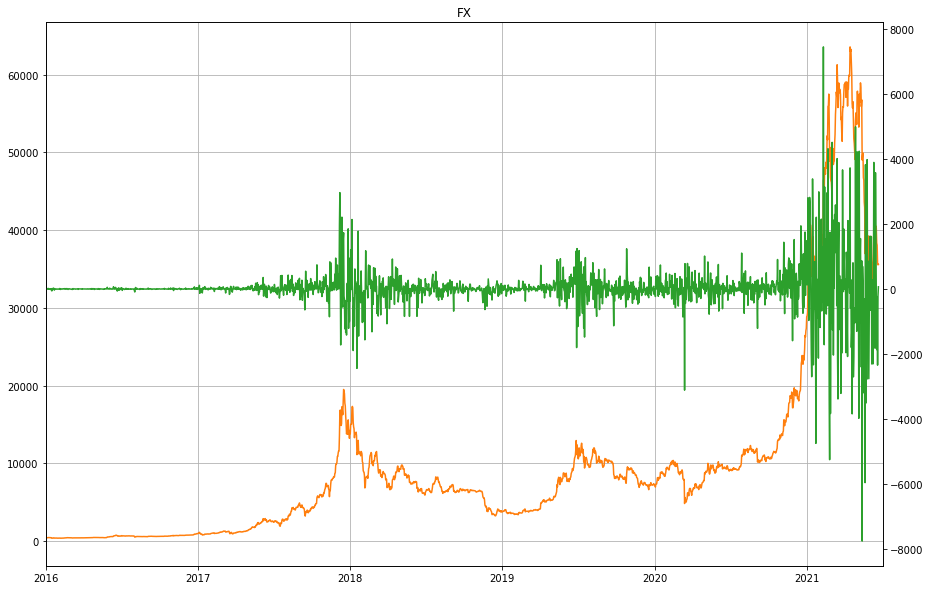

In [13]:
from datetime import datetime
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("FX")

ax.plot(data.index, data.Value, color='tab:orange')
#ax.plot(fx2.Datetime, fx2.Open, color='tab:blue')
ax2 = ax.twinx() 
ax2.plot(data.index, data.diff(1), color='tab:green')
#ax2.plot(fx2.Datetime, fx2.pdx30, color='tab:red')
#ax2.plot(fx2.Datetime, fx2.pddx30, color='tab:pink')
ax.grid(True)
plt.xlim(datetime.fromisoformat("2016-01-01"),datetime.fromisoformat("2021-07-01"))
plt.show()

In [14]:
 vol = q.get('VOL/MSFT')

In [15]:
vol

,Hv10,Hv20,Hv30,Hv60,Hv90,Hv120,Hv150,Hv180,Phv10,Phv20,...,IvMean360,IvMeanSkew360,IvCall720,IvPut720,IvMean720,IvMeanSkew720,IvCall1080,IvPut1080,IvMean1080,IvMeanSkew1080
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.1341,0.2541,0.2283,0.1905,0.2191,0.2052,0.1900,0.1869,0.1470,0.1811,...,0.2158,0.0201,0.2339,0.2215,0.2277,0.0159,0.2353,0.2220,0.2287,0.0157
2015-01-05,0.0978,0.2563,0.2289,0.1917,0.2200,0.2044,0.1902,0.1874,0.1432,0.1738,...,0.2224,0.0248,0.2398,0.2222,0.2310,0.0175,0.2410,0.2224,0.2317,0.0170
2015-01-06,0.1097,0.2622,0.2238,0.1941,0.2206,0.2049,0.1910,0.1888,0.1664,0.1761,...,0.2256,0.0239,0.2412,0.2259,0.2336,0.0176,0.2419,0.2264,0.2341,0.0171
2015-01-07,0.1644,0.2253,0.2294,0.1916,0.2152,0.2058,0.1919,0.1891,0.1775,0.1713,...,0.2244,0.0214,0.2402,0.2282,0.2342,0.0173,0.2413,0.2284,0.2348,0.0171
2015-01-08,0.2574,0.2500,0.2482,0.2057,0.2191,0.2120,0.1968,0.1933,0.1901,0.1703,...,0.2175,0.0189,0.2357,0.2234,0.2295,0.0199,0.2369,0.2237,0.2303,0.0200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.2989,0.3617,0.3754,0.3741,0.3634,0.3276,0.2999,0.2864,0.4222,0.3828,...,0.3194,0.0235,0.2661,0.3282,0.2972,0.0143,0.2649,0.3287,0.2968,0.0150
2018-12-26,0.5916,0.4789,0.4478,0.3838,0.3892,0.3476,0.3166,0.3012,0.4737,0.4089,...,0.3053,0.0303,0.2618,0.3083,0.2851,0.0045,0.2619,0.3048,0.2834,0.0035
2018-12-27,0.5734,0.4789,0.4319,0.3833,0.3894,0.3476,0.3151,0.3013,0.4845,0.4151,...,0.3060,0.0218,0.2538,0.3322,0.2930,0.0062,0.2517,0.3325,0.2921,0.0048


In [16]:
q.get_table('FXCM/H1', date='2017-07-02', symbol='EUR/USD')

,symbol,date,hour,openbid,highbid,lowbid,closebid,openask,highask,lowask,closeask,totalticks
None,,,,,,,,,,,,
0,EUR/USD,2017-07-02,19,1.14173,1.14225,1.14134,1.14155,1.14243,1.14268,1.14170,1.14249,227
1,EUR/USD,2017-07-02,20,1.14155,1.14203,1.14137,1.14175,1.14249,1.14249,1.14169,1.14214,249
2,EUR/USD,2017-07-02,21,1.14175,1.14207,1.14158,1.14206,1.14214,1.14250,1.14175,1.14227,1617
3,EUR/USD,2017-07-02,22,1.14206,1.14267,1.14189,1.14250,1.14227,1.14285,1.14211,1.14255,2924
4,EUR/USD,2017-07-02,23,1.14250,1.14258,1.14210,1.14232,1.14255,1.14260,1.14212,1.14234,1927


In [17]:
#
# Python Module to Generate a
# Sample Financial Data Set
#
# Python for Algorithmic Trading
# (c) Dr. Yves J. Hilpisch
# The Python Quants GmbH
#
import numpy as np
import pandas as pd

r = 0.05  # constant short rate
sigma = 0.5  # volatility factor


def generate_sample_data(rows, cols, freq='1min'):
    '''
    Function to generate sample financial data.

    Parameters
    ==========
    rows: int
        number of rows to generate
    cols: int
        number of columns to generate
    freq: str
        frequency string for DatetimeIndex

    Returns
    =======
    df: DataFrame
        DataFrame object with the sample data
    '''
    rows = int(rows)
    cols = int(cols)
    # generate a DatetimeIndex object given the frequency
    index = pd.date_range('2021-1-1', periods=rows, freq=freq)
    # determine time delta in year fractions
    dt = (index[1] - index[0]) / pd.Timedelta(value='365D')
    # generate column names
    columns = ['No%d' % i for i in range(cols)]
    # generate sample paths for geometric Brownian motion
    raw = np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt +
                 sigma * np.sqrt(dt) *
                 np.random.standard_normal((rows, cols)), axis=0))
    # normalize the data to start at 100
    raw = raw / raw[0] * 100
    # generate the DataFrame object
    df = pd.DataFrame(raw, index=index, columns=columns)
    return df



In [18]:
rows = 5  # number of rows
columns = 3  # number of columns
freq = 'D'  # daily frequency
print(generate_sample_data(rows, columns, freq))

                   No0         No1         No2
2021-01-01  100.000000  100.000000  100.000000
2021-01-02  100.765138  101.309813  102.785663
2021-01-03   94.237663   99.397198  100.577536
2021-01-04   95.078643   98.116107   93.592513
2021-01-05   95.767756   94.972993   93.618937


In [19]:
%time data = generate_sample_data(rows=5e6, cols=10).round(4) 

Wall time: 7.31 s


In [20]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2021-01-01 00:00:00 to 2030-07-05 05:19:00
Freq: T
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   No0     float64
 1   No1     float64
 2   No2     float64
 3   No3     float64
 4   No4     float64
 5   No5     float64
 6   No6     float64
 7   No7     float64
 8   No8     float64
 9   No9     float64
dtypes: float64(10)
memory usage: 419.6 MB


 h5 = pd.HDFStore('./data.h5', 'w')  

%time h5['data'] = data  

h5

h5.close() 

# SMA

In [25]:
 raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
                            index_col=0, parse_dates=True).dropna() 

In [26]:
 raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [30]:
data = pd.DataFrame(raw['EUR='])

In [34]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [35]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [36]:
data['SMA1'] = data['price'].rolling(42).mean()

In [37]:
data['SMA2'] = data['price'].rolling(252).mean()

In [38]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


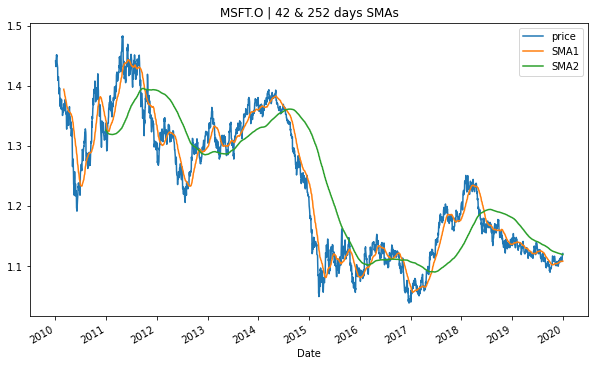

In [39]:
data.plot(title='MSFT.O | 42 & 252 days SMAs',
                   figsize=(10, 6));

In [40]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

In [41]:
data.dropna(inplace=True)

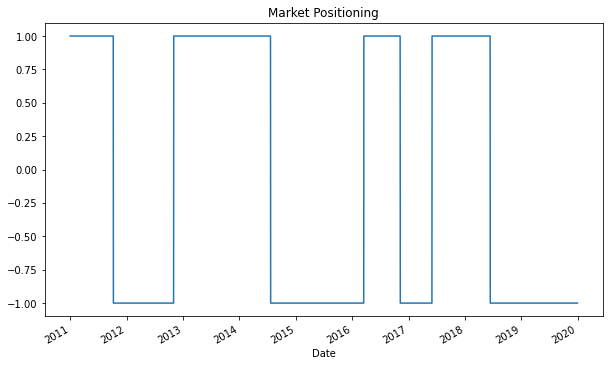

In [42]:
data['position'].plot(ylim=[-1.1, 1.1],
                               title='Market Positioning',
                               figsize=(10, 6));

In [43]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

In [44]:
data

,price,SMA1,SMA2,position,returns
Date,,,,,
2010-12-31,1.3377,1.342579,1.326218,1,NaN
2011-01-03,1.3351,1.340945,1.325798,1,-0.001946
2011-01-04,1.3301,1.338940,1.325374,1,-0.003752
2011-01-05,1.3151,1.336448,1.324874,1,-0.011341
2011-01-06,1.3001,1.333995,1.324351,1,-0.011472
...,...,...,...,...,...
2019-12-24,1.1087,1.107698,1.119630,-1,0.000090
2019-12-26,1.1096,1.107740,1.119529,-1,0.000811
2019-12-27,1.1175,1.107924,1.119428,-1,0.007094


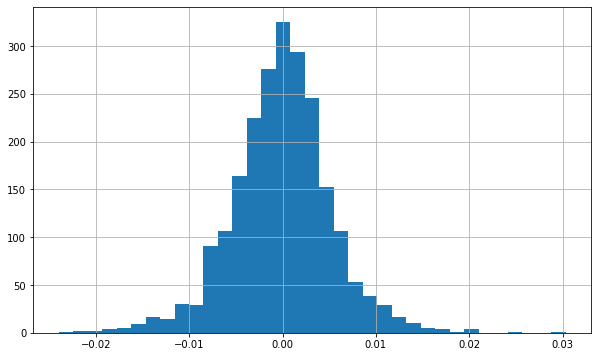

In [45]:
data['returns'].hist(bins=35, figsize=(10, 6));

In [46]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [47]:
data[['returns', 'strategy']].sum() 

returns    -0.176731
strategy    0.253121
dtype: float64

In [48]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

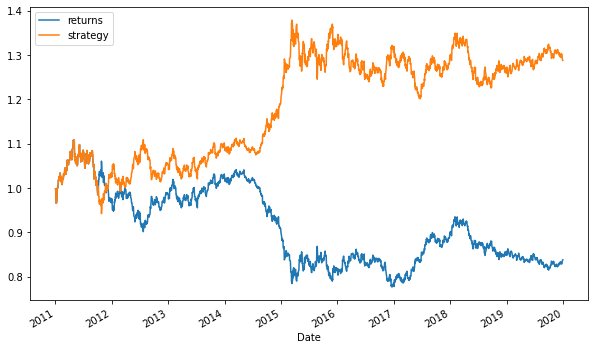

In [49]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [50]:
data[['returns', 'strategy']].mean() * 252

returns    -0.019671
strategy    0.028174
dtype: float64

In [51]:
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns    -0.019479
strategy    0.028575
dtype: float64

In [52]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.085414
strategy    0.085405
dtype: float64

In [53]:
(data[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5 

returns     0.085405
strategy    0.085373
dtype: float64

In [54]:
sharpe=(0.028575-(-0.019479))/0.085373

In [55]:
sharpe

0.5628711653567287

In [56]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [57]:
data['cummax'] = data['cumret'].cummax()

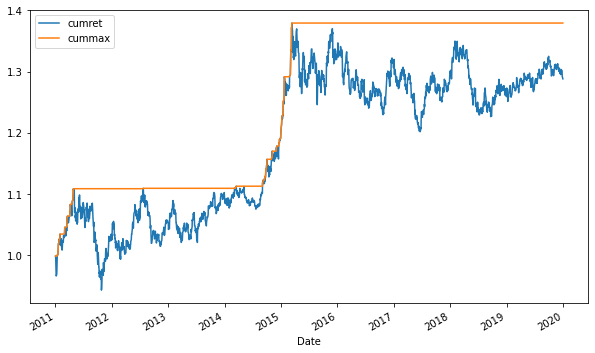

In [58]:
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6));

In [59]:
drawdown = data['cummax'] - data['cumret'] 

In [60]:
drawdown.max()

0.17779367070195895

In [61]:
temp = drawdown[drawdown == 0] 

In [62]:
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())

In [63]:
periods.max()

datetime.timedelta(days=596)

In [64]:
import SMAVectorBacktester as SMA

In [65]:
smabt = SMA.SMAVectorBacktester('MSFT.O', 42, 252, '2010-1-1', '2019-12-31')

In [66]:
smabt.run_strategy()

(1.26, -4.39)

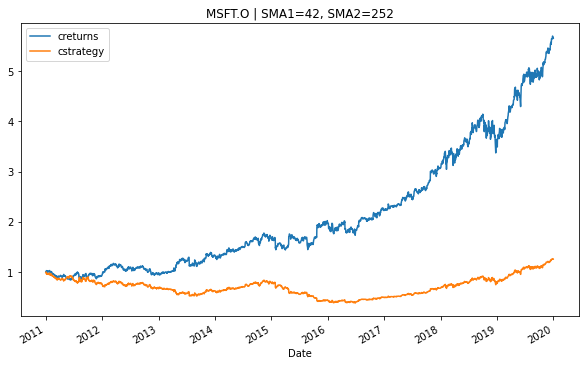

In [67]:
smabt.plot_results() 

In [68]:
%%time
smabt.optimize_parameters((40, 60, 2), (50, 70, 3))

Wall time: 700 ms


(array([40., 50.]), 3.52)

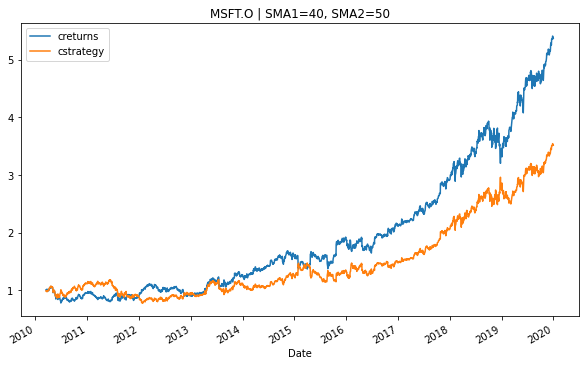

In [69]:
smabt.plot_results() 

# Momentum

In [1]:
import MomVectorBacktester as Mom 

In [2]:
mombt = Mom.MomVectorBacktester('XAU=', '2010-1-1', '2019-12-31', 10000, 0.0)  

In [3]:
mombt.run_strategy(momentum=3)

(20797.87, 7395.53)

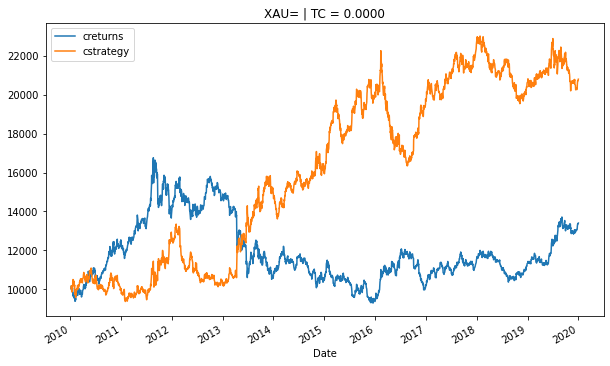

In [4]:
mombt.plot_results()

In [5]:
mombt = Mom.MomVectorBacktester('XAU=', '2010-1-1', '2019-12-31', 10000, 0.0005)

In [6]:
mombt.run_strategy(momentum=13)

(11851.09, -2033.31)

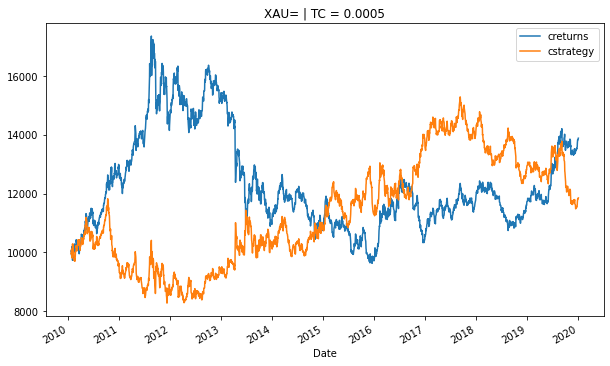

In [7]:
mombt.plot_results()

In [10]:
mombt.optimize_parameters(MM=(1, 50, 1))

(1, 50, 1)


(42.0, 17192.96)

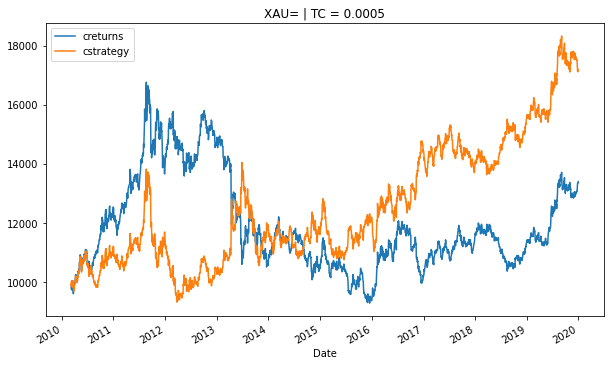

In [11]:
mombt.plot_results()

# Mean Return

In [1]:
import MRVectorBacktester as MR 

In [11]:
mrbt = MR.MRVectorBacktester('GDX', '2010-1-1', '2019-12-31', 10000, 0.001)

In [12]:
mrbt.run_strategy(SMA=25, threshold=3.5)

(38189.55, 31009.56)

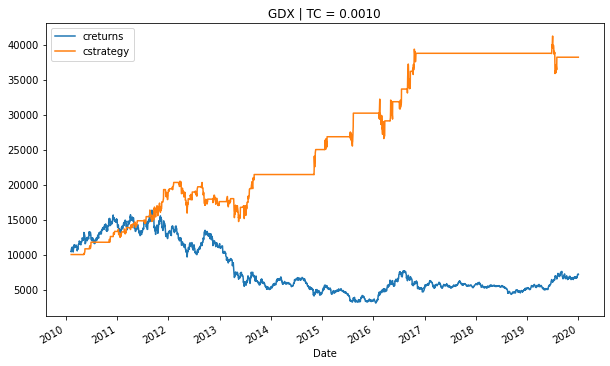

In [13]:
mrbt.plot_results()

In [2]:
import zmq
from datetime import datetime
import plotly.graph_objects as go  

In [3]:
symbol = 'SYMBOL'

In [3]:
fig = go.FigureWidget()  
fig.add_scatter() 
fig

FigureWidget({
    'data': [{'type': 'scatter', 'uid': 'be627dbd-d6d0-480b-9d6b-793767654363'}], 'layout': {'t…

In [4]:
context = zmq.Context()
socket = context.socket(zmq.SUB)
socket.connect('tcp://127.0.0.1:5555')
socket.setsockopt_string(zmq.SUBSCRIBE, 'SYMBOL')

In [5]:
times = list()  
prices = list()

In [12]:
for _ in range(50):
   msg = socket.recv_string()
   t = datetime.now()  
   times.append(t)  
   _, price = msg.split()
   prices.append(float(price))
   fig.data[0].x = times 
   fig.data[0].y = prices

In [7]:
fig = go.FigureWidget()
fig.add_scatter(name='SYMBOL')
fig.add_scatter(name='SMA1', line=dict(width=1, dash='dot'),
                mode='lines+markers')
fig.add_scatter(name='SMA2', line=dict(width=1, dash='dash'),
                mode='lines+markers')
fig

FigureWidget({
    'data': [{'name': 'SYMBOL', 'type': 'scatter', 'uid': '6512b255-062c-4f10-8d40-bd82d0e59aa9…

In [8]:
 import pandas as pd
 df = pd.DataFrame()

In [9]:
for _ in range(75):
    msg = socket.recv_string()
    t = datetime.now()
    sym, price = msg.split()
    df = df.append(pd.DataFrame({sym: float(price)}, index=[t]))  
    df['SMA1'] = df[sym].rolling(5).mean()  
    df['SMA2'] = df[sym].rolling(10).mean()  
    fig.data[0].x = df.index
    fig.data[1].x = df.index
    fig.data[2].x = df.index
    fig.data[0].y = df[sym]
    fig.data[1].y = df['SMA1']
    fig.data[2].y = df['SMA2']


In [20]:
from plotly.subplots import make_subplots

In [ ]:
f = make_subplots(rows=3, cols=1, shared_xaxes=True)  
f.append_trace(go.Scatter(name='SYMBOL'), row=1, col=1)  
f.append_trace(go.Scatter(name='RETURN', line=dict(width=1, dash='dot'),
                  mode='lines+markers', marker={'symbol': 'triangle-up'}),
                  row=2, col=1)  
f.append_trace(go.Scatter(name='MOMENTUM', line=dict(width=1, dash='dash'),
                  mode='lines+markers', marker={'symbol': 'x'}), row=3, col=1)  
f.update_layout(height=600)

In [22]:
fig = go.FigureWidget(f)

In [23]:
fig

FigureWidget({
    'data': [{'name': 'SYMBOL',
              'type': 'scatter',
              'uid': 'd463a420…

In [16]:
import numpy as np

In [17]:
df = pd.DataFrame()

In [24]:
for _ in range(75):
             msg = socket.recv_string()
             t = datetime.now()
             sym, price = msg.split()
             df = df.append(pd.DataFrame({sym: float(price)}, index=[t]))
             df['RET'] = np.log(df[sym] / df[sym].shift(1))
             df['MOM'] = df['RET'].rolling(10).mean()
             fig.data[0].x = df.index
             fig.data[1].x = df.index
             fig.data[2].x = df.index
             fig.data[0].y = df[sym]
             fig.data[1].y = df['RET']
             fig.data[2].y = df['MOM']

In [5]:
socket = context.socket(zmq.SUB)

In [6]:
socket.connect('tcp://127.0.0.1:5556')

In [7]:
socket.setsockopt_string(zmq.SUBSCRIBE, '')

In [8]:
for _ in range(5):
    msg = socket.recv_string()
    print(msg)

47.893 65.737 55.380 34.985 36.385 45.376 71.391 49.161
62.029 70.676 81.534 66.058 17.604 96.703 65.663 94.037
69.810 83.154 3.053 31.843 26.756 29.075 41.256 48.252
31.339 95.443 71.607 29.043 12.886 19.643 16.655 37.603
41.829 99.121 24.891 97.844 61.224 88.928 60.698 96.214


In [9]:
fig = go.FigureWidget()
fig.add_bar()
fig

FigureWidget({
    'data': [{'type': 'bar', 'uid': '57fcfcc5-562f-47be-8cb1-1a2e81fd6195'}], 'layout': {'templ…

In [12]:
x = list('abcdefgh')
fig.data[0].x = x
for _ in range(25):
             msg = socket.recv_string()
             y = msg.split()
             y = [float(n) for n in y]
             fig.data[0].y = y

# OANDA

In [7]:
import tpqoa
api = tpqoa.tpqoa('./pyalgo.cfg')

In [2]:
api.get_instruments()[:250]

[('AUD/CAD', 'AUD_CAD'),
 ('AUD/CHF', 'AUD_CHF'),
 ('AUD/HKD', 'AUD_HKD'),
 ('AUD/JPY', 'AUD_JPY'),
 ('AUD/NZD', 'AUD_NZD'),
 ('AUD/SGD', 'AUD_SGD'),
 ('AUD/USD', 'AUD_USD'),
 ('Australia 200', 'AU200_AUD'),
 ('Brent Crude Oil', 'BCO_USD'),
 ('Bund', 'DE10YB_EUR'),
 ('CAD/CHF', 'CAD_CHF'),
 ('CAD/HKD', 'CAD_HKD'),
 ('CAD/JPY', 'CAD_JPY'),
 ('CAD/SGD', 'CAD_SGD'),
 ('CHF/HKD', 'CHF_HKD'),
 ('CHF/JPY', 'CHF_JPY'),
 ('CHF/ZAR', 'CHF_ZAR'),
 ('China A50', 'CN50_USD'),
 ('Copper', 'XCU_USD'),
 ('Corn', 'CORN_USD'),
 ('EUR/AUD', 'EUR_AUD'),
 ('EUR/CAD', 'EUR_CAD'),
 ('EUR/CHF', 'EUR_CHF'),
 ('EUR/CZK', 'EUR_CZK'),
 ('EUR/DKK', 'EUR_DKK'),
 ('EUR/GBP', 'EUR_GBP'),
 ('EUR/HKD', 'EUR_HKD'),
 ('EUR/HUF', 'EUR_HUF'),
 ('EUR/JPY', 'EUR_JPY'),
 ('EUR/NOK', 'EUR_NOK'),
 ('EUR/NZD', 'EUR_NZD'),
 ('EUR/PLN', 'EUR_PLN'),
 ('EUR/SEK', 'EUR_SEK'),
 ('EUR/SGD', 'EUR_SGD'),
 ('EUR/TRY', 'EUR_TRY'),
 ('EUR/USD', 'EUR_USD'),
 ('EUR/ZAR', 'EUR_ZAR'),
 ('Europe 50', 'EU50_EUR'),
 ('France 40', 'FR40_EUR'),
 ('

In [3]:
help(api.get_history)

Help on method get_history in module tpqoa.tpqoa:

get_history(instrument, start, end, granularity, price, localize=True) method of tpqoa.tpqoa.tpqoa instance
    Retrieves historical data for instrument.
    
    Parameters
    instrument: string
        valid instrument name
    start, end: datetime, str
        Python datetime or string objects for start and end
    granularity: string
        a string like 'S5', 'M1' or 'D'
    price: string
        one of 'A' (ask), 'B' (bid) or 'M' (middle)
    
    Returns
    data: pd.DataFrame
        pandas DataFrame object with data



In [94]:
instrument = 'EUR_USD'  
start = '2021-05-10 12:00' #'2021-06-24'  
end = '2021-05-10 15:00'   #'2021-06-26'  
granularity = 'M1'  
price = 'M'

In [95]:
data = api.get_history(instrument, start, end, granularity, price)

In [86]:
data2 = api.get_history(instrument, start, end, granularity, 'A')

In [87]:
data

,o,h,l,c,volume,complete
time,,,,,,
2021-05-10 12:00:00,1.21629,1.21634,1.21620,1.21632,94,True
2021-05-10 12:01:00,1.21631,1.21636,1.21621,1.21629,107,True
2021-05-10 12:02:00,1.21631,1.21643,1.21630,1.21642,61,True
2021-05-10 12:03:00,1.21643,1.21645,1.21627,1.21631,64,True
2021-05-10 12:04:00,1.21631,1.21635,1.21627,1.21629,53,True
...,...,...,...,...,...,...
2021-05-10 14:55:00,1.21548,1.21577,1.21540,1.21566,165,True
2021-05-10 14:56:00,1.21565,1.21580,1.21536,1.21546,174,True
2021-05-10 14:57:00,1.21545,1.21569,1.21545,1.21567,162,True


In [6]:
data[['c', 'volume']].tail()

,c,volume
time,,
2021-06-28 06:50:00,1.19308,44
2021-06-28 06:51:00,1.19324,81
2021-06-28 06:52:00,1.19310,54
2021-06-28 06:53:00,1.19310,68
2021-06-28 06:54:00,1.19308,63


In [7]:
import numpy as np

In [41]:
data['returns'] = np.log(data['c'] / data['c'].shift(1))

In [42]:
cols = []

In [43]:
for momentum in [15, 30, 60, 120]:  
             col = 'position_{}'.format(momentum)  
             data[col] = np.sign(data['returns'].rolling(momentum).mean())  
             cols.append(col)

In [44]:
data

,o,h,l,c,volume,complete,returns,position_15,position_30,position_60,position_120
time,,,,,,,,,,,
2020-08-10 00:00:00,1.17814,1.17822,1.17814,1.17822,18,True,NaN,NaN,NaN,NaN,NaN
2020-08-10 00:01:00,1.17823,1.17841,1.17822,1.17836,32,True,0.000119,NaN,NaN,NaN,NaN
2020-08-10 00:02:00,1.17834,1.17834,1.17826,1.17828,25,True,-0.000068,NaN,NaN,NaN,NaN
2020-08-10 00:03:00,1.17827,1.17834,1.17827,1.17834,13,True,0.000051,NaN,NaN,NaN,NaN
2020-08-10 00:04:00,1.17836,1.17852,1.17836,1.17847,43,True,0.000110,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-11 23:55:00,1.17364,1.17371,1.17361,1.17366,22,True,0.000026,-1.0,1.0,-1.0,-1.0
2020-08-11 23:56:00,1.17364,1.17364,1.17361,1.17364,9,True,-0.000017,-1.0,1.0,-1.0,-1.0
2020-08-11 23:57:00,1.17365,1.17366,1.17356,1.17357,11,True,-0.000060,-1.0,-1.0,-1.0,-1.0


In [45]:
from pylab import plt
plt.style.use('seaborn')
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [46]:
strats = ['returns']

In [47]:
for col in cols:  
             strat = 'strategy_{}'.format(col.split('_')[1])  
             data[strat] = data[col].shift(1) * data['returns']  
             strats.append(strat)

In [48]:
strats

['returns', 'strategy_15', 'strategy_30', 'strategy_60', 'strategy_120']

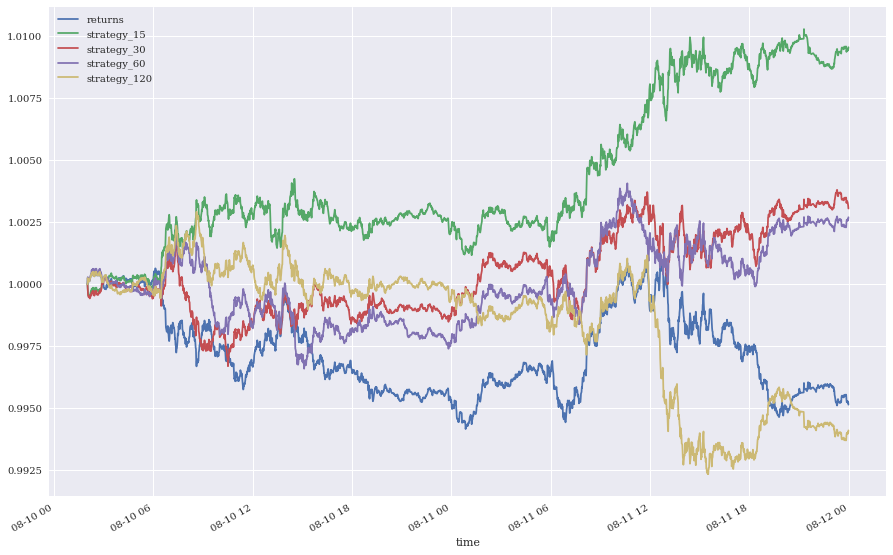

In [49]:
data[strats].dropna().cumsum().apply(np.exp).plot(figsize=(15, 10));

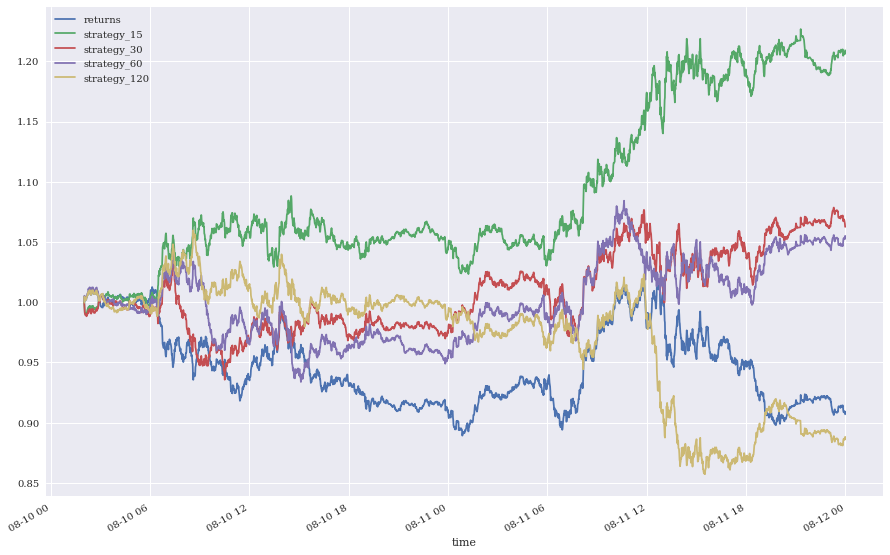

In [50]:
data[strats].dropna().cumsum().apply(
                     lambda x: x * 20).apply(np.exp).plot(figsize=(15, 10)); 

In [9]:
instrument = 'EUR_USD'

api.stream_data(instrument, stop=10) 

2021-06-28T06:57:38.711565633Z 1.19318 1.19325
2021-06-28T06:57:41.802557771Z 1.19316 1.19324
2021-06-28T06:57:42.796491660Z 1.19318 1.19325
2021-06-28T06:57:43.378799286Z 1.19316 1.19324
2021-06-28T06:57:43.465180966Z 1.19313 1.19321
2021-06-28T06:57:43.904950685Z 1.19316 1.19323
2021-06-28T06:57:44.025815750Z 1.19315 1.19322
2021-06-28T06:57:44.240358255Z 1.19315 1.19322
2021-06-28T06:57:44.700677676Z 1.19313 1.19321
2021-06-28T06:57:46.706009464Z 1.19312 1.1932


In [57]:
help(api.create_order) 

Help on method create_order in module tpqoa.tpqoa:

create_order(instrument, units, price=None, sl_distance=None, tsl_distance=None, tp_price=None, comment=None, touch=False, suppress=False, ret=False) method of tpqoa.tpqoa.tpqoa instance
    Places order with Oanda.
    
    Parameters
    instrument: string
        valid instrument name
    units: int
        number of units of instrument to be bought
        (positive int, eg 'units=50')
        or to be sold (negative int, eg 'units=-100')
    price: float
        limit order price, touch order price
    sl_distance: float
        stop loss distance price, mandatory eg in Germany
    tsl_distance: float
        trailing stop loss distance
    tp_price: float
        take profit price to be used for the trade
    comment: str
        string
    touch: boolean
        market_if_touched order (requires price to be set)
    suppress: boolean
        whether to suppress print out
    ret: boolean
        whether to return the order obje

In [56]:
api.create_order(instrument, 1000)



 {'id': '7', 'time': '2021-06-27T21:36:49.250590888Z', 'userID': 19782541, 'accountID': '101-012-19782541-001', 'batchID': '6', 'requestID': '78872624205613371', 'type': 'ORDER_FILL', 'orderID': '6', 'instrument': 'EUR_USD', 'units': '1000.0', 'gainQuoteHomeConversionFactor': '0.833748869262', 'lossQuoteHomeConversionFactor': '0.842128254883', 'price': 1.19369, 'fullVWAP': 1.19369, 'fullPrice': {'type': 'PRICE', 'bids': [{'price': 1.19312, 'liquidity': '1000000'}, {'price': 1.19311, 'liquidity': '2000000'}, {'price': 1.1931, 'liquidity': '2000000'}, {'price': 1.19308, 'liquidity': '5000000'}], 'asks': [{'price': 1.19369, 'liquidity': '1000000'}, {'price': 1.19371, 'liquidity': '2000000'}, {'price': 1.19372, 'liquidity': '2000000'}, {'price': 1.19373, 'liquidity': '5000000'}], 'closeoutBid': 1.19308, 'closeoutAsk': 1.19373}, 'reason': 'MARKET_ORDER', 'pl': '0.0', 'financing': '0.0', 'commission': '0.0', 'guaranteedExecutionFee': '0.0', 'accountBalance': '100000.0', 'tradeOpened': {'tr

In [10]:
 import MomentumTrader as MT
 mt = MT.MomentumTrader('./pyalgo.cfg',  
                                instrument=instrument,  
                                bar_length='10s',  
                                momentum=6,  
                                units=10000)

In [ ]:
mt.stream_data(mt.instrument, stop=1000)

In [17]:
oo = mt.create_order(instrument, units=-mt.position * mt.units,
                              ret=True, suppress=True) 

In [14]:
api.get_account_summary()

{'id': '101-012-19782541-001',
 'alias': 'Primary',
 'currency': 'EUR',
 'balance': '99999.734',
 'createdByUserID': 19782541,
 'createdTime': '2021-06-27T08:49:23.787817407Z',
 'guaranteedStopLossOrderMode': 'DISABLED',
 'pl': '-0.266',
 'resettablePL': '-0.266',
 'resettablePLTime': '0',
 'financing': '0.0',
 'commission': '0.0',
 'guaranteedExecutionFees': '0.0',
 'marginRate': '0.02',
 'openTradeCount': 5,
 'openPositionCount': 1,
 'pendingOrderCount': 1,
 'hedgingEnabled': False,
 'unrealizedPL': '147.2884',
 'NAV': '100147.0224',
 'marginUsed': '33300.0',
 'marginAvailable': '66847.7556',
 'positionValue': '1000000.0',
 'marginCloseoutUnrealizedPL': '184.2006',
 'marginCloseoutNAV': '100183.9346',
 'marginCloseoutMarginUsed': '33300.0',
 'marginCloseoutPercent': '0.16619',
 'marginCloseoutPositionValue': '1000000.0',
 'withdrawalLimit': '66847.7556',
 'marginCallMarginUsed': '33300.0',
 'marginCallPercent': '0.33239',
 'lastTransactionID': '26'}

In [11]:
api.get_transactions()

[{'id': '1',
  'time': '2021-06-27T08:49:23.787817407Z',
  'userID': 19782541,
  'accountID': '101-012-19782541-001',
  'batchID': '1',
  'requestID': '1754211492456815382',
  'type': 'CREATE',
  'divisionID': 12,
  'siteID': 101,
  'accountUserID': 19782541,
  'accountNumber': 1,
  'homeCurrency': 'EUR'},
 {'id': '2',
  'time': '2021-06-27T08:49:23.787817407Z',
  'userID': 19782541,
  'accountID': '101-012-19782541-001',
  'batchID': '1',
  'requestID': '1754211492456815382',
  'type': 'CLIENT_CONFIGURE',
  'alias': 'Primary',
  'marginRate': '0.02'},
 {'id': '3',
  'time': '2021-06-27T08:49:24.406225467Z',
  'userID': 19782541,
  'accountID': '101-012-19782541-001',
  'batchID': '3',
  'requestID': '1772225890970314363',
  'type': 'TRANSFER_FUNDS',
  'amount': '100000.0',
  'fundingReason': 'CLIENT_FUNDING',
  'accountBalance': '100000.0'},
 {'id': '4',
  'time': '2021-06-27T10:59:28.895208341Z',
  'userID': 19782541,
  'accountID': '101-012-19782541-001',
  'batchID': '4',
  'reques

In [15]:
api.print_transactions() #tid=int(oo['id']) - 18)

   7 | 2021-06-27T21:36:49.25 | EUR_USD |   1000.0 |      0.0
   9 | 2021-06-27T21:47:55.82 | EUR_USD |  -1000.0 |   -0.261
  11 | 2021-06-27T21:51:48.34 | EUR_USD | 1000000.0 |      0.0
  14 | 2021-06-28T07:04:12.08 | EUR_USD |  10000.0 |      0.0
  16 | 2021-06-28T07:06:21.29 | EUR_USD | -20000.0 |   0.4999
  18 | 2021-06-28T07:07:32.42 | EUR_USD |  20000.0 |      0.0
  20 | 2021-06-28T07:08:00.23 | EUR_USD | -20000.0 |  -0.1683
  22 | 2021-06-28T07:08:10.27 | EUR_USD |  20000.0 |      0.0
  24 | 2021-06-28T07:08:53.40 | EUR_USD | -20000.0 |  -0.3366
  26 | 2021-06-28T07:21:28.03 | EUR_USD |  10000.0 |      0.0


# FXCM

In [22]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [23]:
 from fxcmpy import fxcmpy_tick_data_reader as tdr

In [66]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [74]:
start = dt.datetime(2021, 6, 14)  
stop = dt.datetime(2021, 6, 20)

In [75]:
td = tdr('EURUSD', start, stop)

In [76]:
td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 988981 entries, 06/13/2021 21:00:08.282 to 06/18/2021 20:59:00.121
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     988981 non-null  float64
 1   Ask     988981 non-null  float64
dtypes: float64(2)
memory usage: 22.6+ MB


In [77]:
td.get_data().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 988981 entries, 2021-06-13 21:00:08.282000 to 2021-06-18 20:59:00.121000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     988981 non-null  float64
 1   Ask     988981 non-null  float64
dtypes: float64(2)
memory usage: 22.6 MB


In [78]:
td.get_data().head()

,Bid,Ask
2021-06-13 21:00:08.282,1.21043,1.21117
2021-06-13 21:03:16.660,1.21032,1.21121
2021-06-13 21:03:25.060,1.21039,1.21118
2021-06-13 21:05:02.880,1.21029,1.21116
2021-06-13 21:05:03.046,1.21057,1.21110


In [79]:
sub = td.get_data(start='2021-06-14 12:00:00',
                    end='2021-06-14 12:15:00')

In [80]:
sub.head()

,Bid,Ask
2021-06-14 12:00:00.019,1.21160,1.21160
2021-06-14 12:00:00.087,1.21160,1.21161
2021-06-14 12:00:00.104,1.21160,1.21163
2021-06-14 12:00:00.109,1.21161,1.21163
2021-06-14 12:00:00.115,1.21162,1.21163


In [82]:
sub.tail()

,Bid,Ask
2021-06-14 12:14:59.659,1.21122,1.21124
2021-06-14 12:14:59.694,1.21123,1.21124
2021-06-14 12:14:59.703,1.21122,1.21124
2021-06-14 12:14:59.730,1.21122,1.21123
2021-06-14 12:14:59.952,1.21122,1.21124


In [83]:
 sub['Mid'] = sub.mean(axis=1)

In [86]:
sub['SMA'] = sub['Mid'].rolling(100).mean()

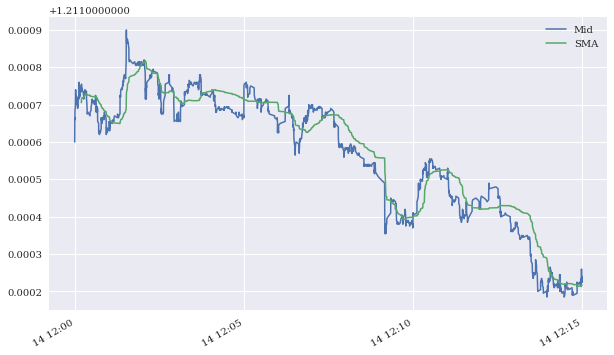

In [87]:
sub[['Mid', 'SMA']].plot(figsize=(10, 6), lw=1.5);

In [88]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [89]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [110]:
start = dt.datetime(2020, 4, 1)
stop = dt.datetime(2020, 5, 1)

In [111]:
period = 'H1' 

In [112]:
candles = cdr('EURUSD', start, stop, period)

In [98]:
data = candles.get_data()

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2020-03-29 21:00:00 to 2020-05-01 20:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   600 non-null    float64
 1   BidHigh   600 non-null    float64
 2   BidLow    600 non-null    float64
 3   BidClose  600 non-null    float64
 4   AskOpen   600 non-null    float64
 5   AskHigh   600 non-null    float64
 6   AskLow    600 non-null    float64
 7   AskClose  600 non-null    float64
dtypes: float64(8)
memory usage: 58.4 KB


In [113]:
data[data.columns[:4]].tail()

,BidOpen,BidHigh,BidLow,BidClose
2020-05-01 16:00:00,1.09976,1.09996,1.09850,1.09874
2020-05-01 17:00:00,1.09874,1.09888,1.09785,1.09818
2020-05-01 18:00:00,1.09818,1.09820,1.09757,1.09766
2020-05-01 19:00:00,1.09766,1.09816,1.09747,1.09793
2020-05-01 20:00:00,1.09793,1.09812,1.09730,1.09788


In [114]:
data[data.columns[4:]].tail()

,AskOpen,AskHigh,AskLow,AskClose
2020-05-01 16:00:00,1.09980,1.09998,1.09853,1.09876
2020-05-01 17:00:00,1.09876,1.09891,1.09786,1.09818
2020-05-01 18:00:00,1.09818,1.09822,1.09758,1.09768
2020-05-01 19:00:00,1.09768,1.09818,1.09748,1.09795
2020-05-01 20:00:00,1.09795,1.09856,1.09733,1.09841


In [116]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)

In [117]:
data['SMA1'] = data['MidClose'].rolling(30).mean()  
data['SMA2'] = data['MidClose'].rolling(100).mean() 

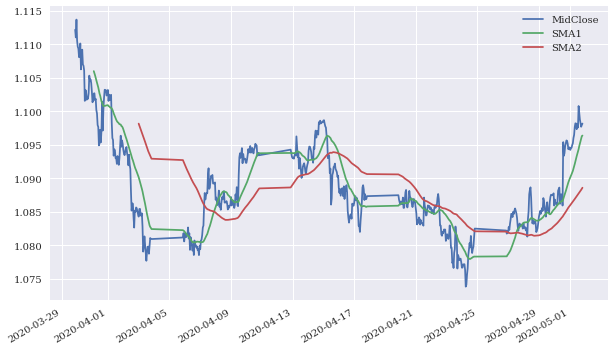

In [118]:
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10, 6));

In [24]:
import fxcmpy
fxcmpy.__version__

'1.2.6'

In [25]:
api = fxcmpy.fxcmpy(config_file='./pyalgo.cfg')

In [26]:
instruments = api.get_instruments()

In [27]:
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/ILS', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'VOLX', 'USDOLLAR', 'US2000', 'INDIA50', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'USOilSpot', 'UKOilSpot', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'CryptoMajor', 'EOS/USD', 'XLM/USD', 'ESPORTS', 'BIOTECH', 'CANNABIS', 'FAANG', 'CHN.TECH', 'CHN.ECOMM', 'USEquities', 'AIRLINES', 'CASINOS', 'TRAVEL', 'US.ECOMM', 'US.BANKS', 'US.AUTO', 'WFH', 'ATMX', 'BA.

In [28]:
api.get_candles('BCH/USD', period='m1', number=10) 

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2021-06-27 21:06:00,448.41,448.67,448.73,448.28,451.71,451.98,452.03,451.59,61
2021-06-27 21:07:00,448.62,448.70,448.95,448.55,451.92,452.03,452.30,451.91,65
2021-06-27 21:08:00,448.69,448.51,448.82,448.37,452.01,451.81,452.13,451.68,54
2021-06-27 21:09:00,448.55,449.96,449.98,448.42,451.86,453.26,453.28,451.73,52
2021-06-27 21:10:00,449.98,449.74,450.83,449.64,453.29,453.04,454.14,452.95,61
2021-06-27 21:11:00,449.88,450.02,450.33,449.88,453.18,453.32,453.64,453.18,55
2021-06-27 21:12:00,450.03,450.48,450.51,449.92,453.34,453.78,453.81,453.23,45
2021-06-27 21:13:00,450.50,450.25,450.92,449.88,453.81,453.55,454.22,453.19,61
2021-06-27 21:14:00,450.26,450.38,450.40,450.04,453.57,453.68,453.70,453.35,56


In [10]:
import datetime as dt
start = dt.datetime(2020, 1, 1)  
end = dt.datetime(2021, 6, 30)

In [11]:
candles = api.get_candles('EUR/GBP', period='D1', start=start, stop=end)

In [12]:
candles.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 457 entries, 2020-01-02 22:00:00 to 2021-06-25 21:00:00
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bidopen   457 non-null    float64
 1   bidclose  457 non-null    float64
 2   bidhigh   457 non-null    float64
 3   bidlow    457 non-null    float64
 4   askopen   457 non-null    float64
 5   askclose  457 non-null    float64
 6   askhigh   457 non-null    float64
 7   asklow    457 non-null    float64
 8   tickqty   457 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 35.7 KB


In [29]:
candles = api.get_candles('EUR/USD', period='m1', number=250)

<AxesSubplot:xlabel='date'>

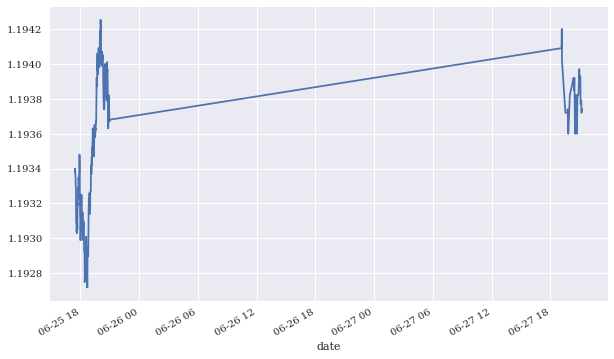

In [30]:
candles['askclose'].plot(figsize=(10, 6))

In [32]:
def output(data, dataframe):
    print('%3d | %s | %s | %6.5f, %6.5f' % (len(dataframe), data['Symbol'],
      pd.to_datetime(int(data['Updated']), unit='ms'),
      data['Rates'][0], data['Rates'][1])) 

In [43]:
api.subscribe_market_data('EUR/USD', (output,))

In [44]:
api.get_last_price('EUR/USD')

Bid     1.19323
Ask     1.19374
High    1.19406
Low     1.19312
Name: 2021-06-27 21:17:34.271000, dtype: float64

In [45]:
api.unsubscribe_market_data('EUR/USD') 

In [37]:
sel = ['tradeId', 'amountK', 'currency', 'grossPL', 'isBuy']

In [40]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,174742561,100,EUR/USD,-37.71276,True
1,174743075,100,EUR/USD,-42.74113,True


In [39]:
order = api.create_market_buy_order('EUR/USD', 100)

In [41]:
api.get_default_account()

1297114

In [42]:
api.get_accounts().T

,0
t,6
ratePrecision,0
accountId,1297114
balance,50000
usdMr,3330
mc,N
mcDate,
accountName,01297114
usdMr3,6660
hedging,Y


In [88]:
fx=pd.read_csv("./drive/MyDrive/data/DAT_ASCII_EURUSD_M1_2021.csv", delimiter=';')

In [89]:
fx['Datetime'] = pd.to_datetime(fx['Datetime'], format="%Y%m%d %H%M%S")

In [90]:
fx['Datetime'] = fx['Datetime'].dt.tz_localize('US/Eastern').dt.tz_convert('utc')

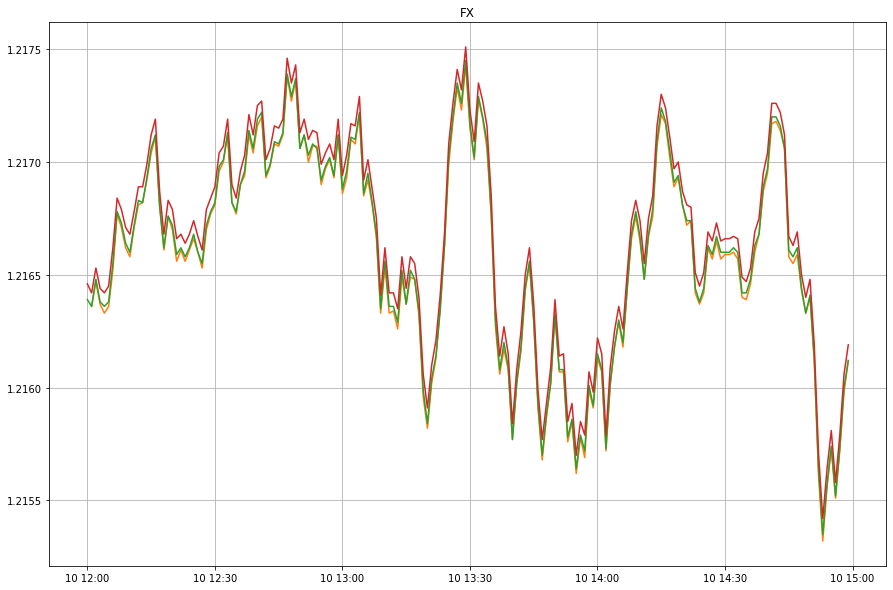

In [96]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("FX")
fx2=fx.loc[(fx.Datetime > "2021-05-10 12:00") & (fx.Datetime < "2021-05-10 15:00")]
ax.plot(fx2.Datetime, fx2.Close, color='tab:orange')
#ax.plot(fx2.Datetime, fx2.Open, color='tab:blue')
ax.plot(data.c, color='tab:green')
ax.plot(data2.c, color='tab:red')
ax.grid(True)
plt.show()

In [11]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import mplfinance as mpf

In [ ]:
tsla_df = yf.download('EURUSD=X', 
                      start='2021-07-29', 
                      end='2021-07-30', interval="1h",
                      progress=False)
tsla_df.head()

In [18]:
import yfinance as yf

msft = yf.Ticker('EURUSD=X')
msft.calendar

C:\Users\msves\AppData\Roaming\Python\Python38\site-packages\mplfinance\plotting.py:535: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


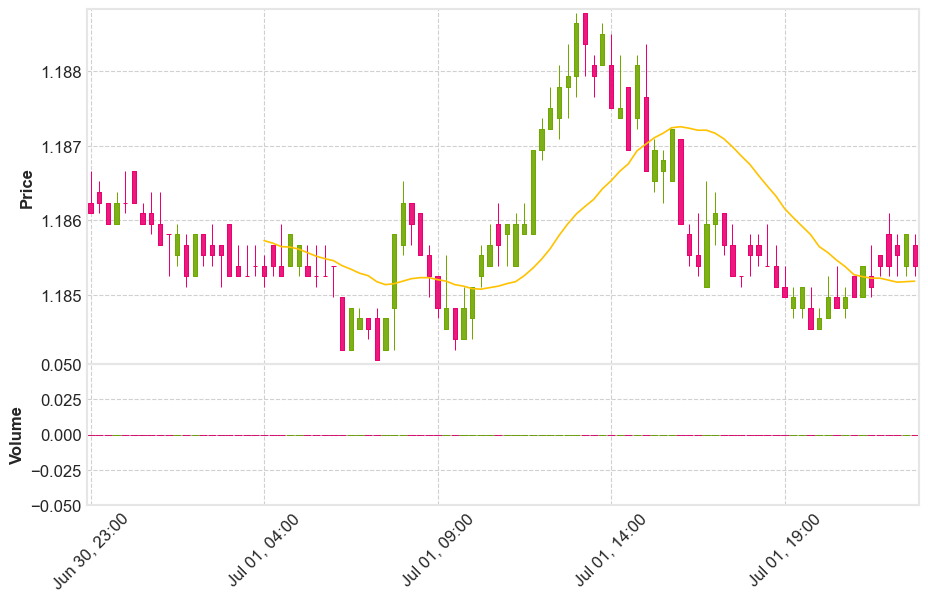

In [5]:
#extra_plot  = mpf.make_addplot(tsla_df["High","Low"])
mpf.plot(tsla_df,  mav=(21), volume=True,figratio=(10, 6), type="candle", tight_layout=True, style="binance")


In [13]:
yahoo_financials = YahooFinancials('TSLA')

data = yahoo_financials.get_historical_price_data(start_date='2020-01-01', 
                                                  end_date='2020-12-31', 
                                                  time_interval='daily')

tsla_df = pd.DataFrame(data['TSLA']['prices'])
tsla_df = tsla_df.drop('date', axis=1).set_index('formatted_date')
# filter dataframe by date
tsla_df = tsla_df[(tsla_df.index >= '2020-05-01') & (tsla_df.index <= '2020-06-01')]

tsla_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2020-05-01,154.554001,136.608002,151.000000,140.264008,162659000,140.264008
2020-05-04,152.399994,139.600006,140.199997,152.238007,96185500,152.238007
2020-05-05,159.783997,152.436005,157.957993,153.641998,84958500,153.641998
2020-05-06,157.960007,152.222000,155.300003,156.516006,55616000,156.516006
2020-05-07,159.279999,154.470001,155.442001,156.007996,57638500,156.007996


In [4]:
from collections import Counter
import sys
import sklearn
import numpy as np
import os
import tensorflow as tf
import pandas as pd

tweets = pd.read_csv('./tweets.csv', parse_dates=True, index_col="Datetime")
tweets=tweets.loc[(tweets.index > "2021-07-15 12:00")]
ch = tweets.Username.unique()
w = []
for i in ch:
    c = tweets[tweets.Username == i]
    w.append(str(Counter(" ".join(c["Text"]).split()).most_common(20)))

# initialise data of lists.
data = {'Name': ch,
        'Words': w}

# Create DataFrame
df = pd.DataFrame(data)


df.drop(df[df['Words'].str.contains("The")].index, inplace=True)
df.drop(df[df['Words'].str.contains("the")].index, inplace=True)
df.drop(df[df['Words'].str.contains("of")].index, inplace=True)


df.to_csv("df.csv")


[array([  9.89949494,  32.52691193,  55.15432893,  77.78174593,
       100.40916293, 123.03657993, 139.30003589]), array([-5.65685425, -5.65685425, -5.65685425, -5.65685425, -5.65685425,
       -5.65685425,  0.        ]), array([-2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. ,
       -2. , -1.5]), array([-0.70710678, -0.70710678, -0.70710678, -0.70710678, -0.70710678,
       -0.70710678, -0.70710678, -0.70710678, -0.70710678, -0.70710678,
       -0.70710678, -0.70710678, -0.70710678, -0.70710678, -0.70710678,
       -0.70710678, -0.70710678, -0.70710678, -0.70710678, -0.70710678,
       -0.70710678, -0.70710678, -0.70710678, -0.70710678, -0.70710678,
        0.        ])]


<BarContainer object of 7 artists>

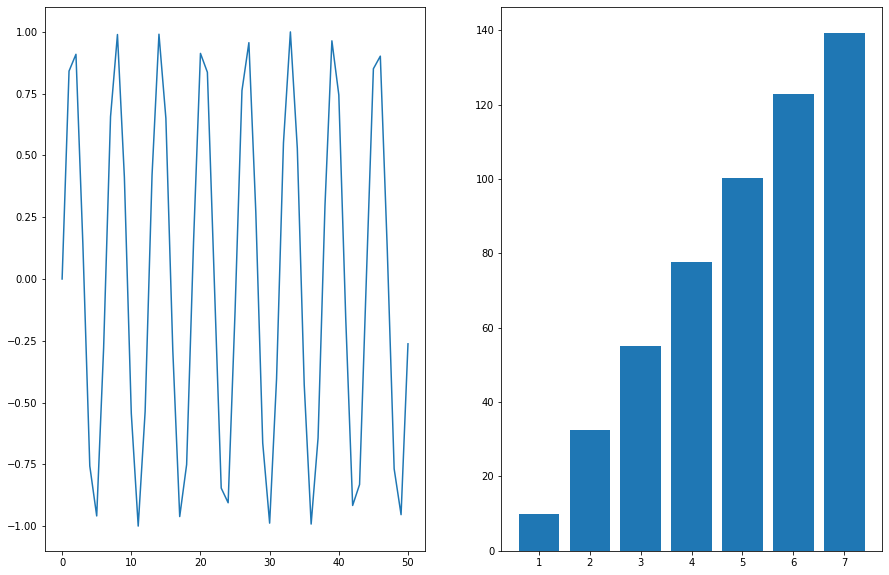

In [16]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

#numpy array create
x = np.arange(51)

# plot diagram
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(x, np.sin(x))

# fast furie transorm
coeffs = pywt.wavedec(x, 'db1', level=3)
print(coeffs)
# plot bar chart
plt.subplot(122)
plt.bar(range(1, len(coeffs[0])+1), coeffs[0])

In [9]:
len(coeffs)

4

In [68]:
# load csv file
df = pd.read_csv('./calendar-event-list.csv', index_col=0, parse_dates=True)

# filter df by impact HIGH
df = df[df['Impact'] == 'HIGH']
# filter by Currency EUR or USD
df = df[(df['Currency'] == 'EUR') | (df['Currency'] == 'USD')]

calendar = list(df.Start)


In [52]:
# function to calc difference in minutes between two datetimes
def diff_in_minutes(time1, time2):
    return int((time1 - time2).total_seconds() / 60)    


In [61]:
calendar

['07/30/2021 08:00:00',
 '07/30/2021 09:00:00',
 '07/30/2021 09:00:00',
 '07/30/2021 09:00:00',
 '07/30/2021 09:00:00',
 '08/02/2021 06:00:00',
 '08/02/2021 14:00:00',
 '08/04/2021 09:00:00',
 '08/04/2021 12:15:00',
 '08/04/2021 14:00:00',
 '08/06/2021 12:30:00',
 '08/12/2021 12:30:00',
 '08/12/2021 12:30:00',
 '08/13/2021 06:00:00',
 '08/13/2021 14:00:00',
 '08/14/2021 09:00:00',
 '08/17/2021 09:00:00',
 '08/17/2021 12:30:00',
 '08/17/2021 12:30:00',
 '08/18/2021 18:00:00',
 '08/23/2021 07:30:00',
 '08/23/2021 07:30:00',
 '08/23/2021 08:00:00',
 '08/26/2021 12:30:00',
 '08/26/2021 12:30:00',
 '08/30/2021 12:30:00',
 '08/31/2021 09:00:00',
 '08/31/2021 09:00:00',
 '08/31/2021 12:00:00']

In [66]:
# function to find match in economics calendar
def find_match(date):
    match = False
    for i in range(0, len(calendar)):
        # parse datetime
        date_time = datetime.strptime(calendar[i], '%m/%d/%Y %H:%M:%S')
        if abs(diff_in_minutes(date,  date_time)) < 30:
            match = True
            break
    return match


In [67]:
find_match(datetime.now())

False

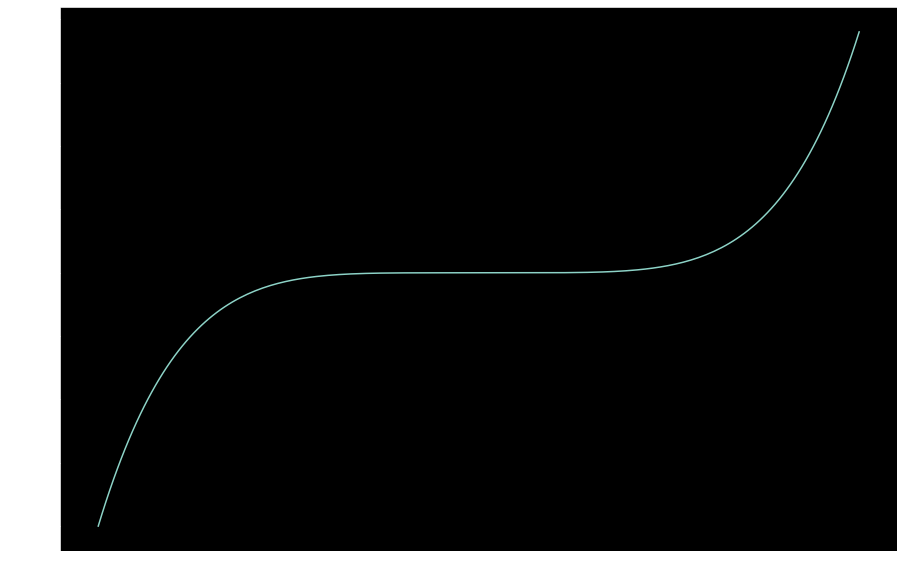

In [8]:
# plot graph of x*2 function
x = np.arange(-10, 10, 0.1)
plt.figure(figsize=(15,10))
plt.plot(x, x*x*x*x*x)

In [ ]:
#create Binance client
client = Client('', '')

import binance


# get BTCUSD from Binance
btc_usd = api.get_symbol_ticker(symbol='BTCUSD')
btc_usd.get('price')

#get SPX500 from quandl
spx = quandl.get('CHRIS/CME_SP1', authtoken='', rows=1000)
spx.head()
